In [1]:
from Continuo.kmeans_inversion import k_means_data, label_maker_alf
from alfabeto_data.pickled_data import *

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
def label_maker(label_list):
    final_labels = []
    for x in label_list:
        final_labels.append('$'+str(x)+'$')
    return final_labels

def corpus_labels_final(data_list, label_list):
    key_types = []
    added_data = []
    added_labels = []
    final_data = []
    final_labels = []
    for x in label_list:
        if x not in key_types:
            key_types.append(x)
    for a in key_types:
        temp_list = []
        for x, y in zip(data_list, label_list):
            if a == y:
                temp_list.append(x)
        added_data.append([sum(elem)/len(elem) for elem in zip(*temp_list)])
    for x, y in zip(data_list, label_list):
        final_data.append(x)
        final_labels.append(y)
    for x in key_types:
        final_labels.append('*'+str(x))
    for x in added_data:
        final_data.append(x)
#     print(final_labels)
    return final_data, label_maker_alf(final_labels)

In [3]:
alf_data = corpus_labels_final(alfabeto_notes_data[0], alfabeto_notes_data[1])
print(alf_data[1])

['$♮:G$', '$♭:G$', '$♭:G$', '$♮:C$', '$♮:A$', '$♮:G$', '$♭:G$', '$♮:C$', '$♮:C$', '$♭:G$', '$♭:D$', '$♭:F$', '$♭:F$', '$♭:G$', '$♮:G$', '$♮:G$', '$♮:D$', '$♮:D$', '$♮:D$', '$♭:G$', '$♭:D$', '$♭:G$', '$♮:G$', '$♮:G$', '$♭:D$', '$♭:F$', '$♭:F$', '$♭:G$', '$♭:C$', '$♭:G$', '$♮:A$', '$♮:G$', '$♭:D$', '$♭:F$', '$♭:F$', '$♮:G$', '$♭:F$', '$♮:G$', '$♮:A$', '$♭:F$', '$♮:A$', '$♮:G$', '$♮:A$', '$♮:G$', '$♭:G$', '$♮:G$', '$♮:G$', '$♭:F$', '$♭:F$', '$♭:G$', '$♭:G$', '$♭:G$', '$♭:G$', '$♮:A$', '$♮:A$', '$♮:A$', '$♮:A$', '$♭:F$', '$♭:F$', '$♭:G$', '$♭:G$', '$♭:G$', '$♮:D$', '$♮:A$', '$♮:D$', '$♭:F$', '$♭:G$', '$♭:F$', '$♭:G$', '$♭:F$', '$♭:F$', '$♭:F$', '$♭:G$', '$♭:G$', '$♭:G$', '$♭:G$', '$♭:G$', '$♭:G$', '$♮:G$', '$♭:G$', '$♮:G$', '$♭:F$', '$♭:G$', '$♭:G$', '$♭:G$', '$♮:G$', '$♭:G$', '$♮:G$', '$♭:G$', '$♮:D$', '$♭:G$', '$♭:G$', '$♮:G$', '$♭:F$', '$♭:G$', '$♮:G$', '$♭:F$', '$♮:G$', '$♮:G$', '$♭:G$', '$♮:C$', '$♭:F$', '$♮:G$', '$♭:G$', '$♭:F$', '$♮:C$', '$♭:G$', '$♭:G$', '$♮:G$', '$♭:F$', '$♭:G$', 

In [4]:
%matplotlib qt
pally = k_means_data(alf_data[0], 2, alf_data[1])

n_digits: 2, 	 n_samples 501, 	 n_features 12
_______________________________________________________________________________
init        time     inertia  homo     compl   v-meas  ARI  AMI   silhouette
k-means++   0.03s    35446   0.306   0.884   0.454   0.329   0.296    0.531
   random   0.02s    35446   0.306   0.884   0.454   0.329   0.296    0.531
PCA-based   0.00s    35446   0.306   0.884   0.454   0.329   0.296    0.531
_______________________________________________________________________________


In [5]:
def silhouette_analysis_3d(list_of_lists, max_clusters):

    X = np.array(list_of_lists)
    y = np.array([x for x in range(len(X))])
    range_n_clusters = [x for x in range(2, max_clusters)]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
#         fig, (ax1, ax2) = plt.subplots(1, 2)
#         ax2 = ax2.gca(projection='3d')
#         fig.set_size_inches(18, 7)
        fig = plt.figure()
        ax2 = fig.subplot('cluster')


        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
#             ax1.fill_betweenx(np.arange(y_lower, y_upper),
#                               0, ith_cluster_silhouette_values,
#                               facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
#             ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

#         ax1.set_title("The silhouette plot for the various clusters.")
#         ax1.set_xlabel("The silhouette coefficient values")
#         ax1.set_ylabel("Cluster label")

#         # The vertical line for average silhoutte score of all the values
#         ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#         ax1.set_yticks([])  # Clear the yaxis labels / ticks
#         ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        
#         ax2 = ax2.add_subplot(2, projection='3d')
        
        ax2.scatter(X[:, 0], X[:, 1], X[:, 2], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

In [6]:
%matplotlib qt
silhouette_analysis_3d(pally, 4)

AttributeError: 'Figure' object has no attribute 'subplot'

In [7]:
def silhouette_analysis(list_of_lists, max_clusters):

    X = np.array(list_of_lists)
    y = np.array([x for x in range(len(X))])
    range_n_clusters = [x for x in range(2, max_clusters)]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhoutte score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

For n_clusters = 2 The average silhouette_score is : 0.617050765337


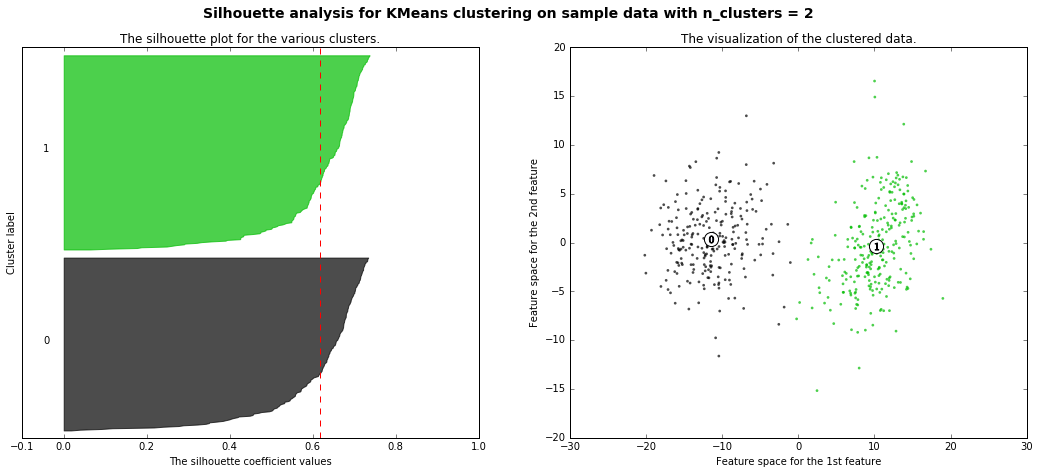

For n_clusters = 3 The average silhouette_score is : 0.442562452331


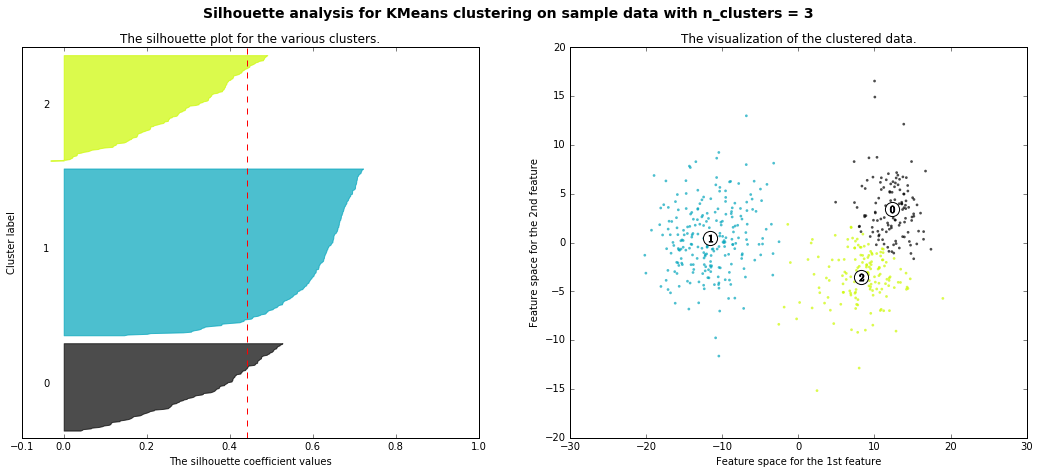

In [9]:
%matplotlib inline
silhouette_analysis(pally, 4)